<a href="https://colab.research.google.com/github/nyjinnn/images/blob/main/week5_quiz_classification_220630.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로지스틱 회귀

## 문제 해결을 위한 데이터셋 준비

1. 필요한 패키기 불러오기


In [54]:
import random
import torch 
import torch.nn as nn 
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

2. 데이터셋 불러오기

In [66]:
cancer = load_breast_cancer()

cancer_data = np.concatenate([cancer.data[:,0:3], cancer.data[:,4:13], cancer.data[:,14:23], cancer.data[:,24:]], axis =1)

print("cancer_data:", np.shape(cancer_data))

cancer_data: (569, 27)


3. 데이터 확인하기 

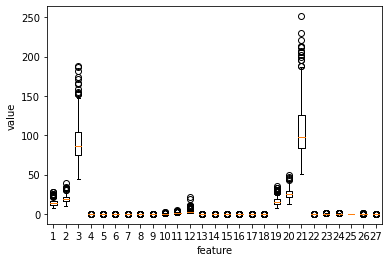

In [69]:
plt.boxplot(cancer_data)
plt.xlabel("feature")
plt.ylabel("value")
plt.show()

4. 학습 데이터셋 준비

In [71]:
x = cancer_data #cancer.data
y = cancer.target 

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)  # 수정 금지 
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, stratify=y_train, test_size=0.125, random_state=999)

x_train_torch = torch.FloatTensor(x_train)
y_train_torch = torch.FloatTensor(y_train)
x_valid_torch = torch.FloatTensor(x_valid)
y_valid_torch = torch.FloatTensor(y_valid) 
x_test_torch = torch.FloatTensor(x_test)
y_test_torch = torch.FloatTensor(y_test)

In [72]:
print(np.mean(x_train[:,0]))
print(np.mean(x_train[:,1]))
print(np.mean(x_train[:,2]))
print(np.mean(x_train[:,3]))
print(np.mean(x_train[:,4]))
print(np.mean(x_train[:,5]))
print(np.mean(x_train[:,6]))
print(np.mean(x_train[:,7]))
print(np.mean(x_train[:,8]))
print(np.mean(x_train[:,9]))
print(np.mean(x_train[:,10]))
print(np.mean(x_train[:,11]))

14.115889447236183
19.200653266331656
91.84585427135679
0.09632163316582915
0.10344281407035176
0.08890080577889448
0.04860188190954775
0.18024472361809046
0.06272502512562814
0.40242386934673363
1.216538944723618
2.834015829145728


5. 모델 준비

In [73]:
class LogisticNeuron(nn.Module):
  def __init__(self, in_dim=30, n_hidden=60, learning_rate=1e-4):
    '''
    Args:
      in_dim: The dimension of input data  
      n_hidden: The dimension of hidden layer
      learning_rate: The initial learning rate for training a network 
    '''
    super().__init__()

    self.model = nn.Sequential(
        nn.Linear(in_dim, 200),
        nn.ReLU(),
        nn.Linear(200, 100),
        nn.ReLU(),
        nn.Linear(100, 50),
        nn.ReLU(),
        nn.Linear(50,1),
        nn.Sigmoid()
        )
    
    self.optim = torch.optim.Adam(self.model.parameters(), lr=learning_rate)
    self.criterion = nn.MSELoss()

  def _calculate_loss(self, x, y):
    loss = self.criterion(x, y)
    return loss 

  def forward(self, x):
    z = self.model(x)
    return z

  def train(self, x, y, epochs=10):
    tmp_acc = -1
    for i in range(epochs):
      for x_i, y_i in zip(x, y):
        pred_y = self.forward(x_i)
        loss = self._calculate_loss(pred_y[0], y_i)

        self.model.zero_grad() 
        self.optim.zero_grad()
        loss.backward()
        self.optim.step()

      if (i+1) % 1 == 0:  # 여기 나누는 값을 조정해서 프린트하는 횟수를 조절
        acc = np.mean(self.predict(x_valid_torch) == y_valid)
        if tmp_acc == -1: 
          tmp_acc = acc 
        if tmp_acc > acc:
          break
        print("epoch {} : err = {:.9f}, valid acc = {:%}".format(i + 1, loss, acc))

  def predict(self, x):
    pred = [self.forward(x_i).data.numpy()[0] for x_i in x]
    return np.array(pred) > 0.5 

In [77]:
random_seed = 740
np.random.seed(random_seed)
torch.manual_seed(random_seed)
random.seed(random_seed)

neuron = LogisticNeuron(in_dim=27, n_hidden=200, learning_rate=1e-3)

neuron.train(x_train_torch, y_train_torch, 100)

epoch 1 : err = 0.308721215, valid acc = 45.614035%
epoch 2 : err = 0.202198520, valid acc = 70.175439%
epoch 3 : err = 0.049237091, valid acc = 80.701754%
epoch 4 : err = 0.065705135, valid acc = 82.456140%
epoch 5 : err = 0.069287665, valid acc = 84.210526%
epoch 6 : err = 0.018851768, valid acc = 84.210526%
epoch 7 : err = 0.007417118, valid acc = 89.473684%
epoch 8 : err = 0.004361602, valid acc = 89.473684%
epoch 9 : err = 0.001620634, valid acc = 89.473684%
epoch 10 : err = 0.002648509, valid acc = 89.473684%
epoch 11 : err = 0.001316392, valid acc = 89.473684%
epoch 12 : err = 0.000894538, valid acc = 89.473684%
epoch 13 : err = 0.000858153, valid acc = 89.473684%
epoch 14 : err = 0.000412002, valid acc = 89.473684%
epoch 15 : err = 0.000413176, valid acc = 89.473684%
epoch 16 : err = 0.000462903, valid acc = 89.473684%
epoch 17 : err = 0.000250383, valid acc = 89.473684%
epoch 18 : err = 0.000252028, valid acc = 89.473684%
epoch 19 : err = 0.000070392, valid acc = 89.473684%
ep

6. 결과

In [78]:
np.mean(neuron.predict(x_test_torch) == y_test)

0.956140350877193